# Support vector machines

Examples taken from

1. Scikit-Learn [web site](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html)
2. [Jake Vanderplas'](https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/03.1-Classification-SVMs.ipynb) Jupyter notebook examples

In [24]:
import sklearn
from sklearn.datasets.samples_generator import make_blobs

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.core.display import HTML
#HTML("<style>.container { width:100% !important; }</style>")

[Create](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) random points in 2 dimensions arranged in two clusters

In [15]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

Create a Support Vector Classifier (SVC)

In [16]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Create a scatter plot using Seaborn

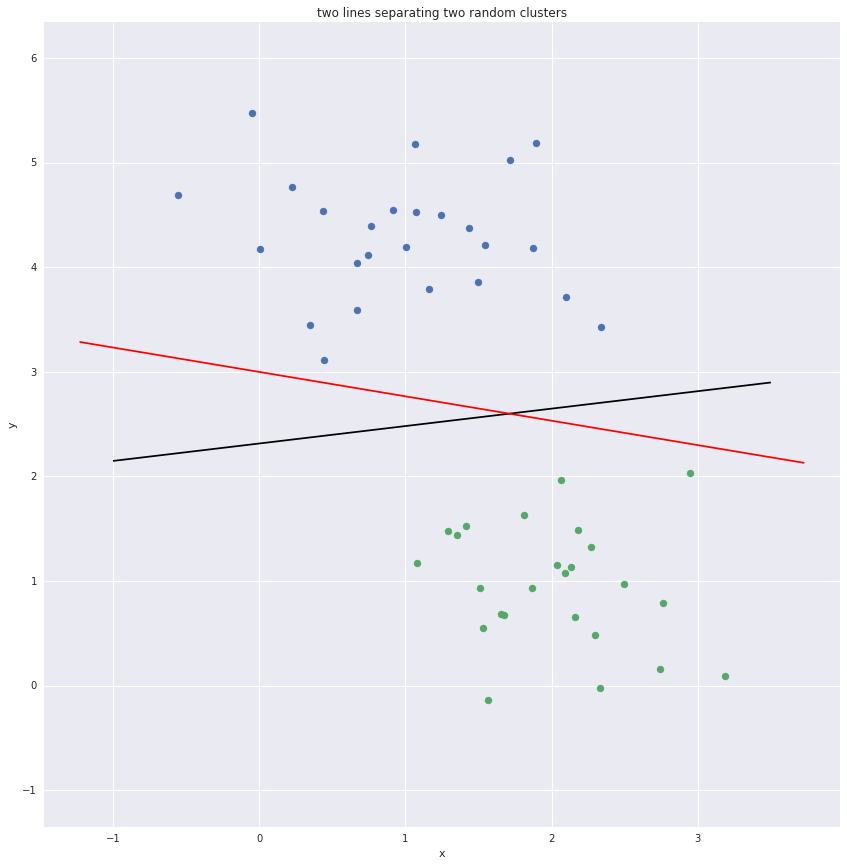

In [17]:
def plot_clusters(X, y):
    df = pd.DataFrame(data=X, columns=['x', 'y'])
    df['category'] = y
    g = sns.FacetGrid(df, hue='category', size=12)
    g = g.map(plt.scatter, 'x', 'y', s=50)
    return g.fig.gca()



def plot_decision_function(ax, clf):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    X_grid, Y_grid = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                       np.linspace(ylim[0], ylim[1], 50))

    points = np.c_[X_grid.reshape(X_grid.size, 1), Y_grid.reshape(Y_grid.size, 1)]
    distance = clf.decision_function(points)
    P_grid = distance.reshape(X_grid.shape[0], X_grid.shape[1])
    ax.contour(X_grid, Y_grid, P_grid,
               colors='black', levels=[0], linestyles=['-'])

ax = plot_clusters(X, y)
plot_decision_function(ax, clf)

# plot line separating clusters
xlim = ax.get_xlim()
x_alt = np.linspace(xlim[0], xlim[1], 2)
y_alt = 1/3.0 * x_alt  + 2.0
y_alt = -0.7/3.0 * x_alt  + 3.0
ax.plot(x_alt, y_alt, 'r-')

ax.set_title('two lines separating two random clusters')

Multiple lines can be drawn to separate the clusters. The black line is preferred to the red line as there is a larger margin between it and the nearest points. The black line is generated using a Support Vector Classifier (SVC), which uses a maximum margin classifier algorithm. The points nearest to the line are known as support vectors. The margins and the support vectors are plotted below.

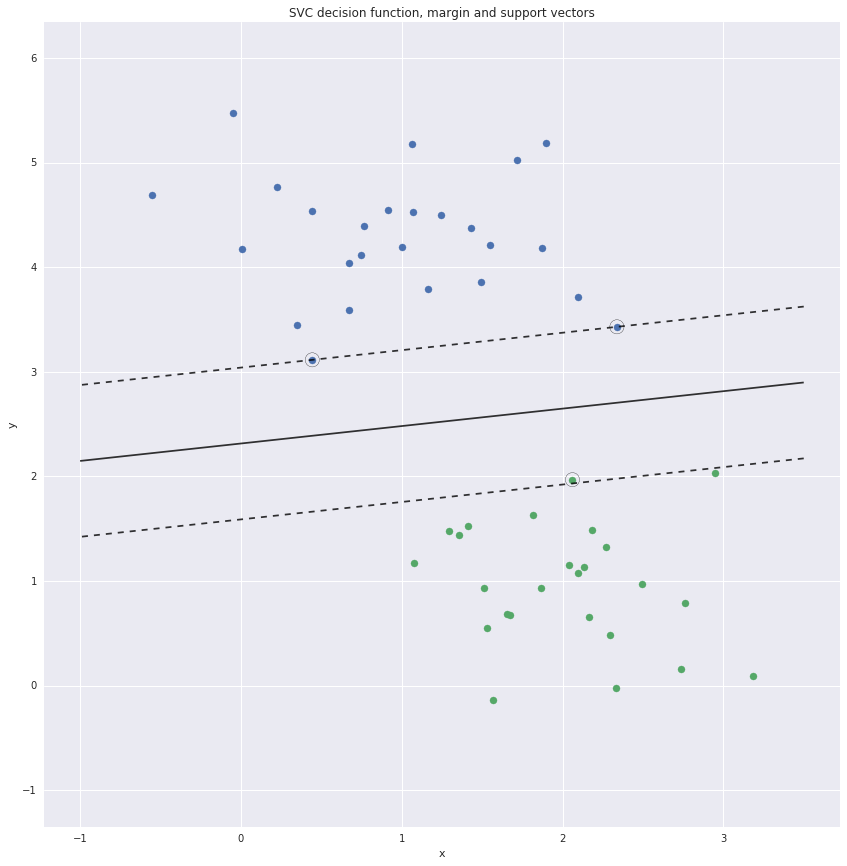

In [18]:
def plot_support_vectors(ax, clf):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    X_grid, Y_grid = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                       np.linspace(ylim[0], ylim[1], 50))

    points = np.c_[X_grid.reshape(X_grid.size, 1), Y_grid.reshape(Y_grid.size, 1)]
    distance = clf.decision_function(points)
    P_grid = distance.reshape(X_grid.shape[0], X_grid.shape[1])
    ax.contour(X_grid, Y_grid, P_grid,
               colors='black', levels=[-1, 0, 1], linestyles=['--', '-', '--'], alpha=0.8)

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none');

ax = plot_clusters(X, y)
plot_support_vectors(ax, clf)
ax.set_title('SVC decision function, margin and support vectors')

Support vector machines/classifiers are linear classifiers. The scikit library can [generate](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) datasets that are not linearly separable.

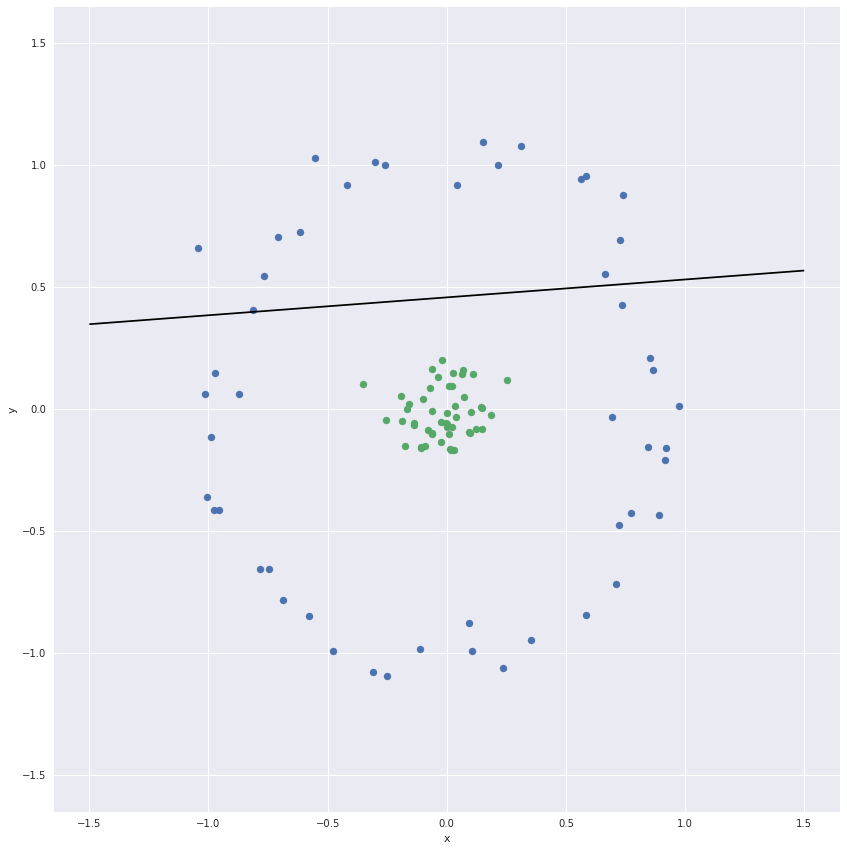

In [19]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

ax = plot_clusters(X, y)
plot_decision_function(ax, clf)

To create a non-linear boundary we use [kernel](http://scikit-learn.org/stable/modules/svm.html#svm-kernels) functions with the Support Vector Classifier. The code below uses radial basis functions (rbf) for the SVC kernel functions.

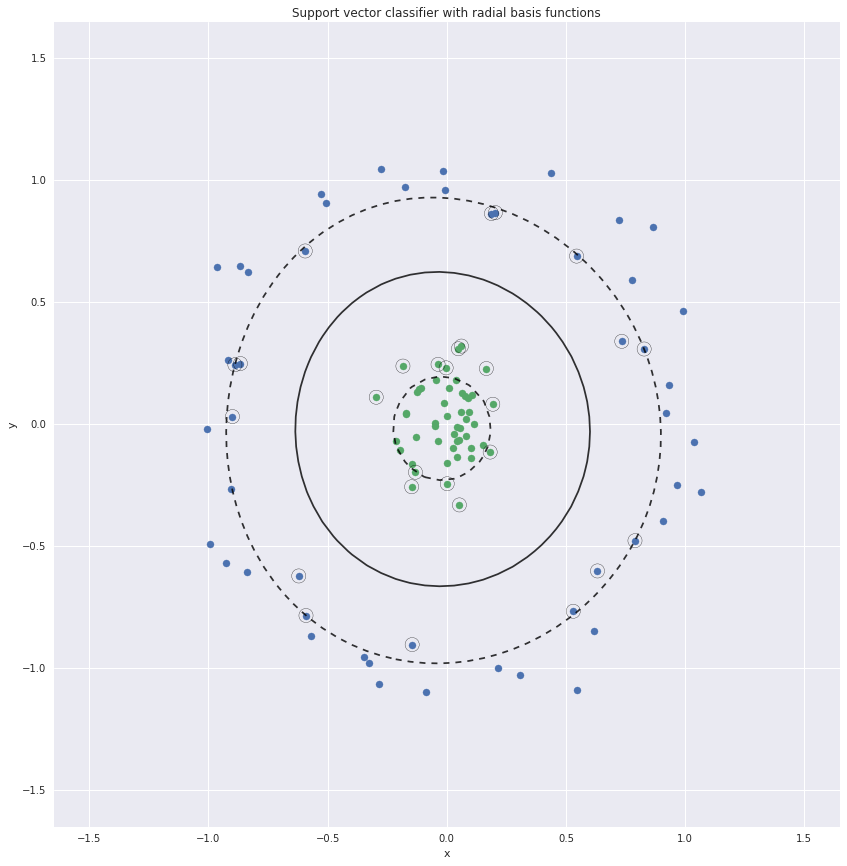

In [22]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='rbf').fit(X, y)

ax = plot_clusters(X, y)
plot_support_vectors(ax, clf)
ax.set_title('Support vector classifier with radial basis functions')

For a more complex example we generate two partly interleaved "moons" and use the radial basis function with a SVC to classify the two clusters.

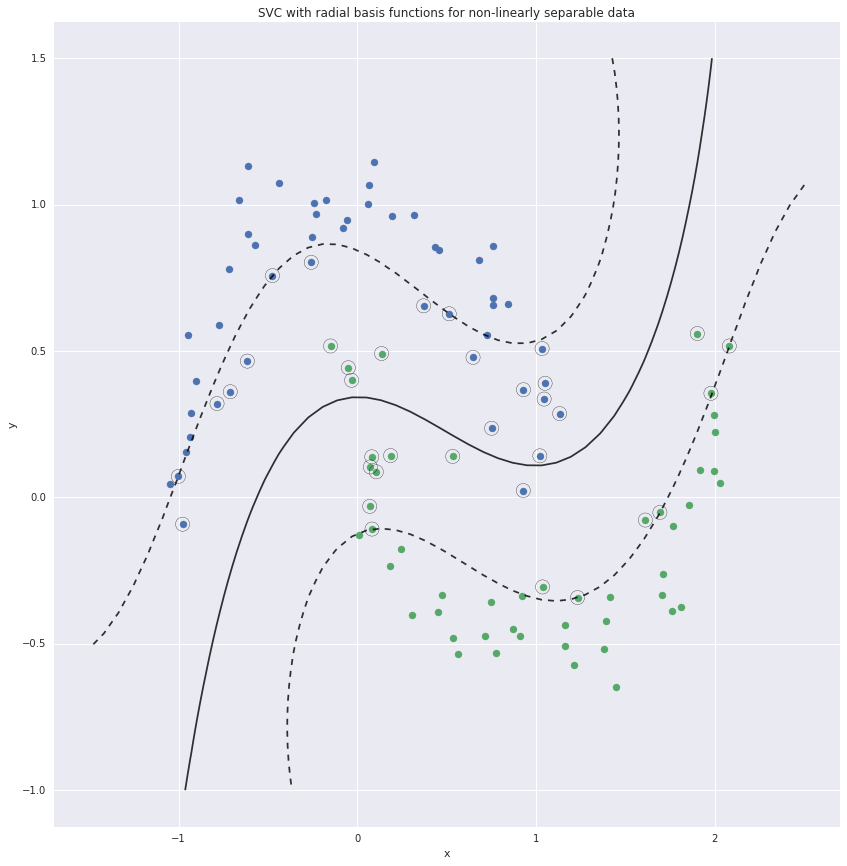

In [23]:
from sklearn.datasets.samples_generator import make_moons
X, y = make_moons(100, noise=.1)

clf = SVC(kernel='rbf').fit(X, y)

ax = plot_clusters(X, y)
plot_support_vectors(ax, clf)
ax.set_title('SVC with radial basis functions for non-linearly separable data')